In [2]:
#Using the geopandas library, turn the latitude and longitude columns into 
#a geographical Point data type then make a geodataframe.
#Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

SyntaxError: invalid syntax (<ipython-input-2-8d5af107c273>, line 1)

In [28]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [29]:
location = "datasets/HuriMike.csv"
newdata = pd.read_csv(location)
newdata.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [30]:
#geocode an entire column in a dataframe
geo_addr = geocode(newdata['AdvisoryNumber'], provider='nominatim')

In [31]:
geo_addr.head()

,geometry,address
0,POINT (-86.1746933 40.3270127),"Indiana, USA"
1,POINT (6.8985752 49.2305578),"1a, West, Saarbrücken, Regionalverband Saarbrü..."
2,POINT (134.9840619 34.6486657),"国道2号, 明石市, 兵庫県, 近畿地方, 47713, 日本"
3,POINT (9.008705219687499 41.87340825),"Corse-du-Sud, Corse, France métropolitaine, Fr..."
4,POINT (-4.8556382 33.8333136),"Fès-Meknès ⴼⴰⵙ-ⵎⴽⵏⴰⵙ فاس-مكناس, Maroc ⵍⵎⵖⵔⵉⴱ ا..."


In [32]:
#add the geometry column (coordinates) to the original dataframe 
newdata['geo_addr'] = geo_addr['geometry']
newdata.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.1746933 40.3270127)
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (6.8985752 49.2305578)
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (134.9840619 34.6486657)
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (9.008705219687499 41.87340825)
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-4.8556382 33.8333136)


In [33]:
newdata['Long'] = 0 - newdata['Long']
newdata.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.1746933 40.3270127)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (6.8985752 49.2305578)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (134.9840619 34.6486657)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (9.008705219687499 41.87340825)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-4.8556382 33.8333136)


In [34]:
newdata['coordinates'] = newdata[['Long', 'Lat']].values.tolist()
newdata.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.1746933 40.3270127),"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (6.8985752 49.2305578),"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (134.9840619 34.6486657),"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (9.008705219687499 41.87340825),"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-4.8556382 33.8333136),"[-86.9, 18.6]"


In [35]:
newdata['coordinates'] = newdata['coordinates'].apply(Point)
newdata.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.1746933 40.3270127),POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (6.8985752 49.2305578),POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (134.9840619 34.6486657),POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (9.008705219687499 41.87340825),POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-4.8556382 33.8333136),POINT (-86.90000000000001 18.6)


In [36]:
type(newdata)

pandas.core.frame.DataFrame

In [37]:
type(newdata['coordinates'])

pandas.core.series.Series

In [38]:
newdata = gpd.GeoDataFrame(newdata, geometry='coordinates')
newdata

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.1746933 40.3270127),POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (6.8985752 49.2305578),POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (134.9840619 34.6486657),POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (9.008705219687499 41.87340825),POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-4.8556382 33.8333136),POINT (-86.90000000000001 18.6)
5,3A,10/07/2018 08:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 07:53,Brown,POINT (6.70054637344879 48.87152855),POINT (-86.8 18.9)
6,4,10/07/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 10:53,Brown,POINT (-6.3676093 33.9204332),POINT (-86.90000000000001 19.2)
7,4A,10/07/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/07/2018 13:44,Brown,POINT (9.9532969 51.5122951),POINT (-86.90000000000001 19.2)
8,5,10/07/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/07/2018 17:02,Brown,POINT (14.3637139 45.9194745),POINT (-85.5 19.2)
9,5A,10/07/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 19:41,Stewart,POINT (9.113999207015871 56.32401835),POINT (-85.40000000000001 19.9)


In [39]:
type(newdata)

geopandas.geodataframe.GeoDataFrame

In [40]:
type(newdata['coordinates'])

geopandas.geoseries.GeoSeries

In [41]:
newdata[newdata['Name']=='Michael']

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,geo_addr,coordinates
7,4A,10/07/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/07/2018 13:44,Brown,POINT (9.9532969 51.5122951),POINT (-86.90000000000001 19.2)
8,5,10/07/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/07/2018 17:02,Brown,POINT (14.3637139 45.9194745),POINT (-85.5 19.2)
9,5A,10/07/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 19:41,Stewart,POINT (9.113999207015871 56.32401835),POINT (-85.40000000000001 19.9)
10,6,10/07/2018 23:00,20.0,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 22:59,Stewart,POINT (-7.9639028 33.2627128),POINT (-85.40000000000001 20)
11,6A,10/08/2018 02:00,20.1,-85.5,60,994,N at 5 MPH (360 deg),Tropical Storm,Michael,10/08/2018 01:44,Berg,POINT (73.81286009999999 29.8879072),POINT (-85.5 20.1)
12,7,10/08/2018 05:00,20.6,-85.5,70,983,N at 7 MPH (360 deg),Tropical Storm,Michael,10/08/2018 04:59,Berg,POINT (-8.365403199999999 31.6048574),POINT (-85.5 20.6)
13,7A,10/08/2018 08:00,20.9,-85.1,70,982,N at 7 MPH (5 deg),Tropical Storm,Michael,10/08/2018 07:59,Brown,POINT (6.8994956 49.2307869),POINT (-85.09999999999999 20.9)
14,8,10/08/2018 11:00,21.2,-84.9,75,982,N at 7 MPH (10 deg),Hurricane,Michael,10/08/2018 10:38,Brown,POINT (-5.1395435 31.1835432),POINT (-84.90000000000001 21.2)
15,8A,10/08/2018 14:00,21.7,-85.1,75,978,N at 7 MPH (360 deg),Hurricane,Michael,10/08/2018 13:41,Brown,POINT (30.341985011967 -26.8649767),POINT (-85.09999999999999 21.7)
16,9,10/08/2018 17:00,22.2,-85.2,80,978,N at 9 MPH (355 deg),Hurricane,Michael,10/08/2018 16:41,Brown,POINT (-8.6322498 30.187722),POINT (-85.2 22.2)


In [42]:
newdata.groupby('Name').Type.count()

Name
FOURTEEN     3
Fourteen     4
Michael     38
Name: Type, dtype: int64

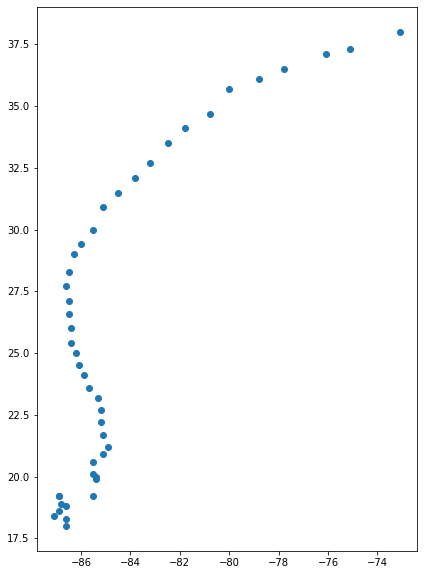

In [43]:
newdata.plot(figsize=(20,10));


In [46]:
country = gpd.read_file("datasets/US_states.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


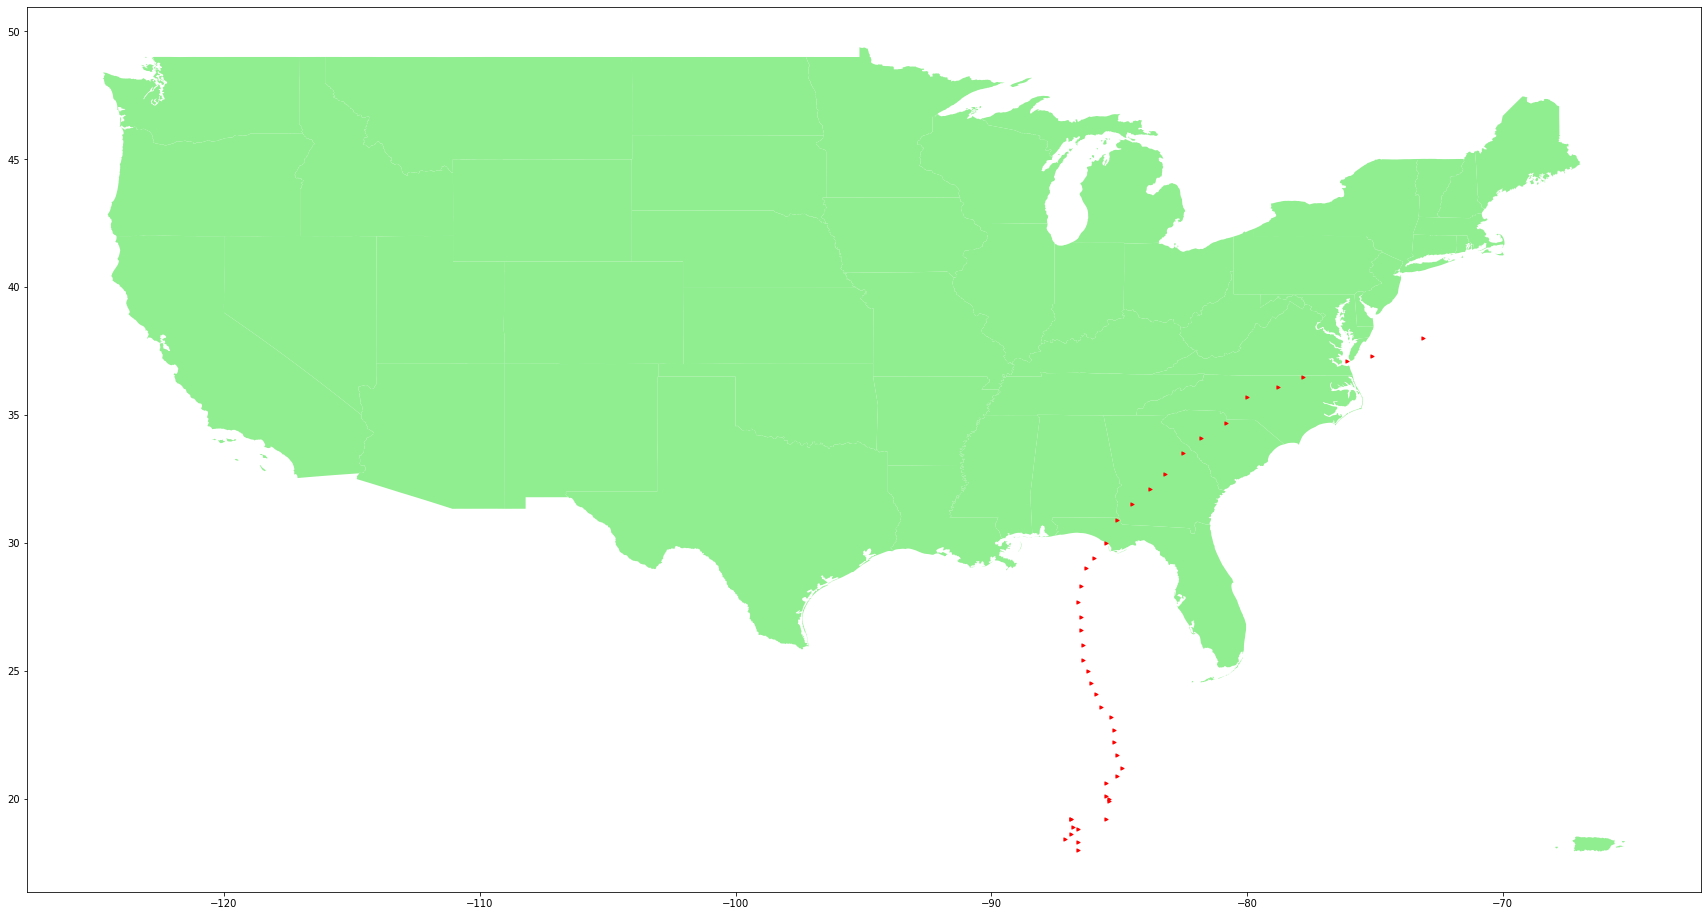

In [59]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='lightgreen')

# plotting the hurricane position on top with red color to stand out:
newdata.plot(ax=base, color='red', marker=">", markersize=10);
